In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
# Import True Dataset
kinds = ['line', 'circle']
x_true = {kind:np.load(kind+'/data.npy') for kind in kinds}

In [8]:
# Import Generated Data
epochs = 3000
print_every = 500
x_generated = {}
alpha = [0.1, 0.3, 0.5, 0.7, 0.9]

for kind in kinds:
    x_generated_kind = {}
    for a in alpha:
        x_generated_kind[a] = np.load(kind+'/alpha_'+str(a)+'/pts_out/gan_generated_pts_epoch_'+str(epochs)+'.npy')
    x_generated[kind] = x_generated_kind

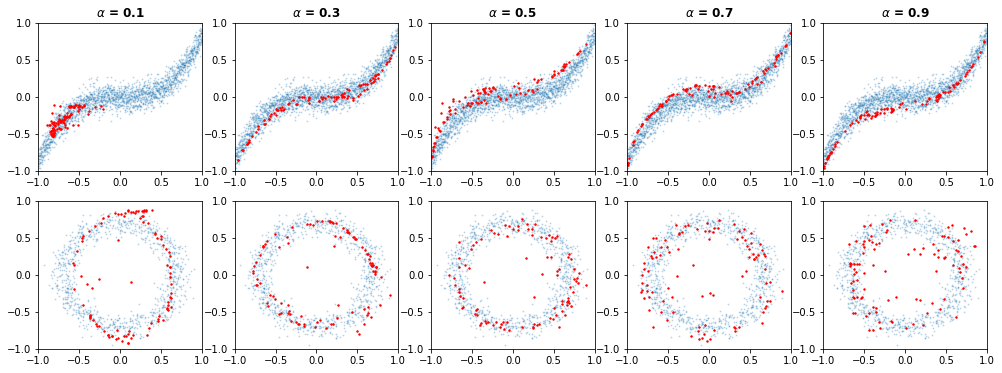

In [9]:
# Plot Fit of the Distribution
plt.figure(figsize=(17,6))
for j,kind in enumerate(kinds):
    for i,a in enumerate(alpha):
        plt.subplot(len(kinds), len(alpha), j*len(alpha)+i+1)
        if j==0:
            plt.title(r'$\alpha$ = '+str(a), fontweight='bold')
        plt.scatter(x_true[kind][:,0], x_true[kind][:,1], s=1, label='True Data', alpha=0.2)
        plt.xticks([-1,-0.5,0,0.5,1])
        plt.yticks([-1,-0.5,0,0.5,1])
        plt.ylim([-1,1])
        plt.xlim([-1,1])
        plt.scatter(x_generated[kind][a][:,0], x_generated[kind][a][:,1], 
                    s=2, c='r')
plt.savefig('plot/pdf_2D_fit.eps', dpi=None, format='eps',
        transparent=True, bbox_inches=None, pad_inches=None,
        frameon=False)
plt.show()

In [10]:
# Load Lossed
losses_D = {}
losses_G = {}

for kind in kinds:
    losses_D_kind = {}
    losses_G_kind = {}
    for i in alpha:
        losses_D_kind[i] = np.load(kind+'/alpha_'+str(i)+'/loss_D.npy')
        losses_G_kind[i] = np.load(kind+'/alpha_'+str(i)+'/loss_G.npy')
    losses_D[kind] = losses_D_kind
    losses_G[kind] = losses_G_kind
    
# Warped Version fo Losses
losses_G_e = {}
losses_D_e = {}
for kind in kinds:
    losses_G_e_kind = {}
    losses_D_e_kind = {}
    for a in alpha:
        idx_warp = [i for i in range(len(losses_G[kind][a]))][0::int(len(losses_G[kind][a])/epochs)]
        losses_G_e_kind[a] = losses_G[kind][a][idx_warp]
        losses_D_e_kind[a] = losses_D[kind][a][idx_warp]
    losses_G_e[kind] = losses_G_e_kind
    losses_D_e[kind] = losses_D_e_kind

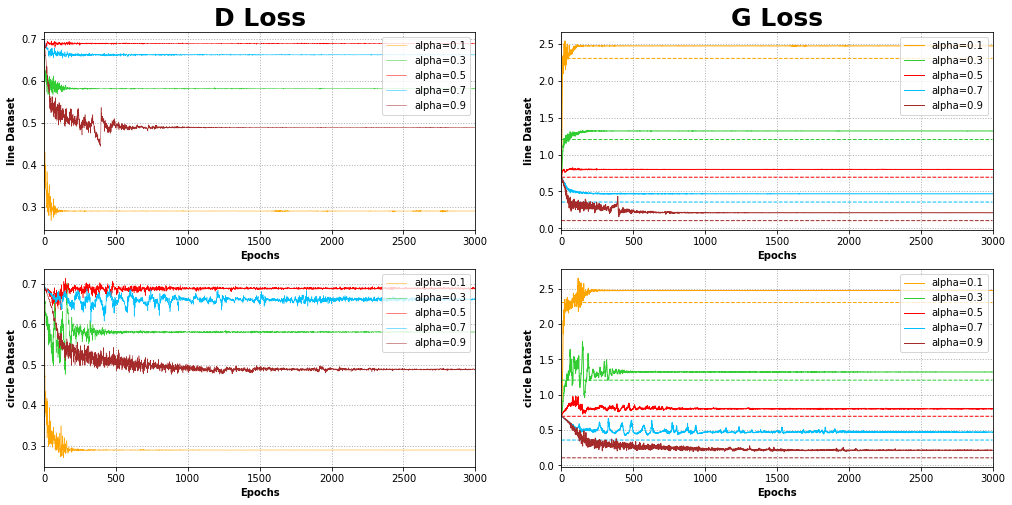

In [11]:
# Plot Losses
colors = ['orange', 'limegreen', 'red', 'deepskyblue', 'brown']

plt.figure(figsize=(17,8))
for j,kind in enumerate(kinds):
    
    plt.subplot(len(kinds),2,j*len(kinds)+1)
    if j==0:
        plt.title('D Loss', fontweight='bold', fontsize=25)
    plt.grid(True, linestyle=':', lw=1)
    plt.xlim(0,epochs)
    for i,a in enumerate(alpha):
        loss_D_th = (-np.log(a) - np.log(1-a)) * np.ones((epochs,))
        plt.plot(losses_D_e[kind][a], label='alpha='+str(a), c=colors[i], lw=0.5)
        #plt.plot(loss_D_th, ls='--', c=colors[i])
        plt.legend(loc=1)
        plt.xlabel('Epochs', fontweight='bold')
        plt.ylabel(kind+' Dataset', fontweight='bold')

    plt.subplot(len(kinds),2,j*len(kinds)+2)
    if j==0:
        plt.title('G Loss', fontweight='bold', fontsize=25)
    plt.xlim(0,epochs)
    plt.grid(True, linestyle=':', lw=1)
    for i,a in enumerate(alpha):
        loss_G_th = (-np.log(a)) * np.ones((epochs,))
        plt.plot(loss_G_th, ls='--', c=colors[i], lw=1)
        plt.plot(losses_G_e[kind][a], label='alpha='+str(a), c=colors[i], lw=1)
        plt.legend(loc=1)
        plt.xlabel('Epochs', fontweight='bold')
        plt.ylabel(kind+' Dataset', fontweight='bold')
plt.savefig('plot/losses_2D.eps', dpi=None, format='eps',
        transparent=True, bbox_inches=None, pad_inches=None,
        frameon=False)
plt.show()